In [1]:
#immporting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#imported Excel file
df = pd.read_excel('loan.xlsx',engine = 'openpyxl')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

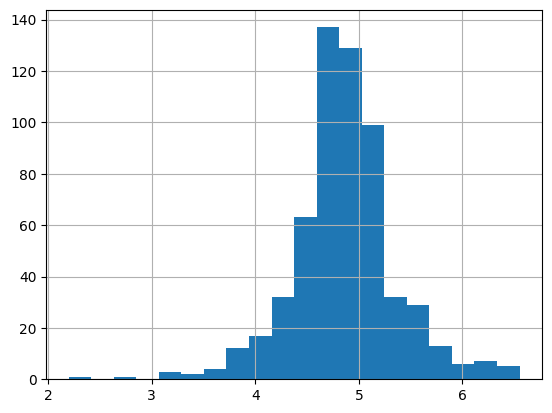

In [8]:
#Normalised the LoanAmount column
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<Axes: >

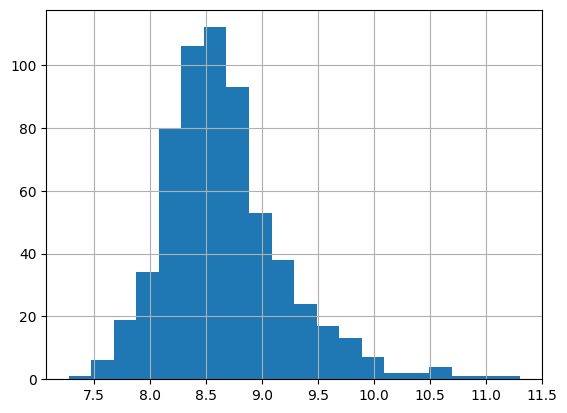

In [10]:
#Added two column to form Total Income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [11]:
#finding null Values
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [6]:
#Using Simple Imputer To impute categorical , Numerical values with Most_freq and mean respectively
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
df[['Married','Gender','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']] = imputer.fit_transform(df[['Married','Gender','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']])

In [12]:
imputer = SimpleImputer(strategy = 'mean')
df[['LoanAmount', 'LoanAmount_log']]  = imputer.fit_transform(df[['LoanAmount', 'LoanAmount_log']])

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [15]:

X = df.iloc[:,np.r_[1:5,9:11,13:15]].values
Y = df.iloc[:,12].values

In [16]:
Y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

number of people who take loan as group by gender


<Axes: xlabel='Gender', ylabel='count'>

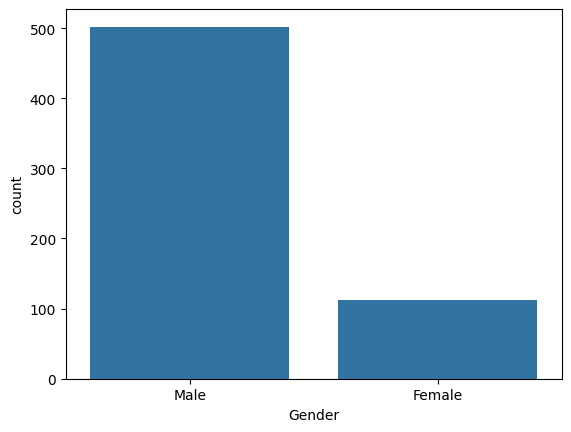

In [19]:
#Plotting Countplot Graph on the basis of gender
print("number of people who take loan as group by gender")
sns.countplot(x='Gender', data = df)

Number of people who take loas as group by martial status


<Axes: xlabel='Married', ylabel='count'>

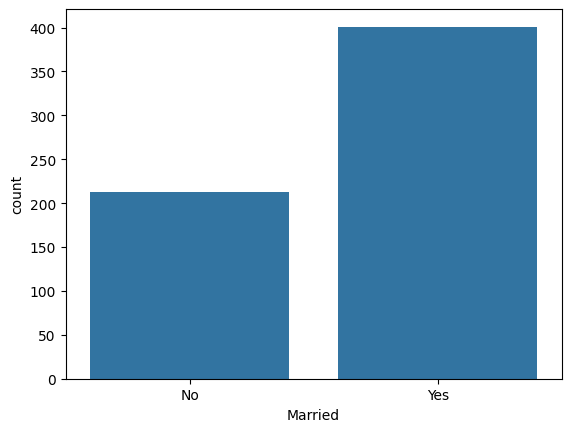

In [20]:
#Plotting Countplot Graph on the basis of Martial Status
print("Number of people who take loan as group by martial status")
sns.countplot(x='Married',data=df)

Number of people who take loas as group by martial status


<Axes: xlabel='Dependents', ylabel='count'>

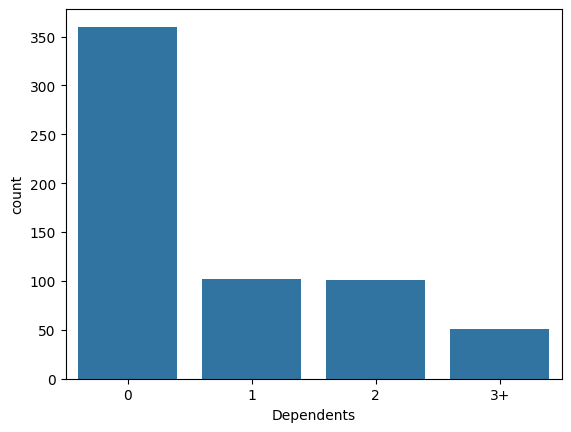

In [21]:
#Plotting Countpplot Graph on the basis of Dependents

print("Number of people who take loas as group by Dependents")
sns.countplot(x='Dependents',data=df)

Number of people who take loas as group by martial status


<Axes: xlabel='Self_Employed', ylabel='count'>

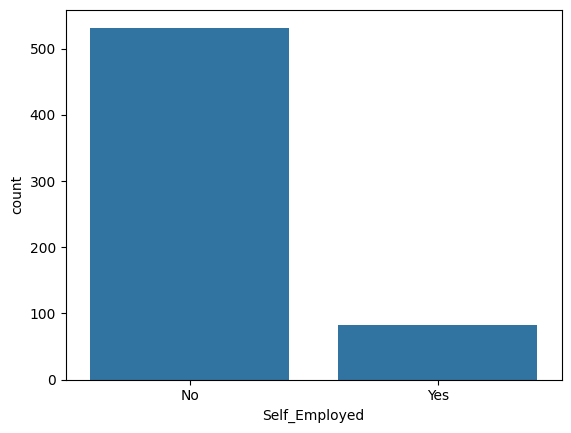

In [23]:
#Plotting countplot Graph on the basis of Self Employed 
print("Number of people who take loas as group by Self_Employed")
sns.countplot(x='Self_Employed',data=df)

Number of people who take loas as group by martial status


<Axes: xlabel='Credit_History', ylabel='count'>

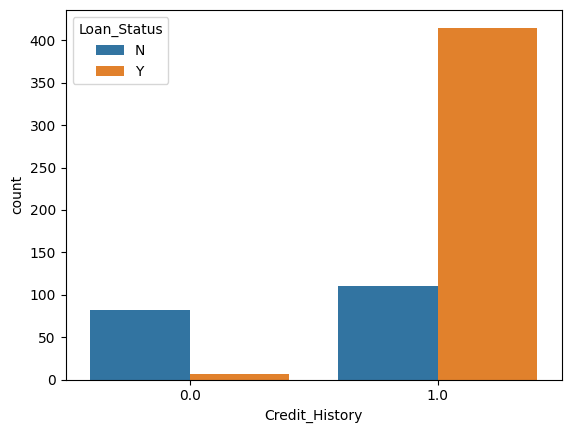

In [27]:
#Plotting Countplot Graph on the basis of Credit history and Loan status
print("Number of people who take loas as group by credit history and loan status")
sns.countplot(x='Credit_History',hue = 'Loan_Status', data=df)

In [28]:
#Splitting the  data for 80% -training and 20%-testing 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 0)
X_train.shape

(491, 8)

In [34]:
#Converting categorical values into (0,1)
from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()
for i in range(0, 5):
    X_train[:, i] = LabelEncoder_x.fit_transform(X_train[:, i].astype(str))
    X_train[:, 7] = LabelEncoder_x.fit_transform(X_train[:,7])

In [35]:
LabelEncoder_y = LabelEncoder()
Y_train = LabelEncoder_y.fit_transform(Y_train)
Y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [36]:
for i in range(0, 5):
    X_test[:, i] = LabelEncoder_x.fit_transform(X_test[:, i].astype(str))
    X_test[:, 7] = LabelEncoder_x.fit_transform(X_test[:,7])

In [37]:
X_test

array([[1, 0, 0, 0, 4, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 4, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 4, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 4, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 4, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 2, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 2, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 4, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 4, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 4, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 4, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 4, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 4, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 4, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 4, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 4, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 4, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 4, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 4, 1.0, 4.532599493153256, 1],
       [1, 1

In [38]:
Y_test = LabelEncoder_y.fit_transform(Y_test)
Y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [40]:
#Scaling the Training and Testing Data
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.fit_transform(X_test)

In [41]:
#Performing random Forest classsifier 
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
#Predicting ON Testing Measures
from sklearn import metrics
Y_pred = rf_clf.predict(X_test)
print("Accuracy of Random Forest Clf ", metrics.accuracy_score(Y_pred,Y_test))
Y_pred

Accuracy of Random Forest Clf  0.7804878048780488


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [47]:
#Performing Dicision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [48]:
#Predicting ON Testing Measures
y_pred = dt_clf.predict(X_test)
print("Accuracy of DTC ", metrics.accuracy_score(y_pred,Y_test))

Accuracy of DTC  0.7073170731707317


In [50]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,Y_train)

,priors,None
,var_smoothing,1e-09


In [51]:
#Predicting ON Testing Measures
y_pred = nb_clf.predict(X_test)
print("Acurracy", metrics.accuracy_score(y_pred,Y_test))

Acurracy 0.8292682926829268


Text(50.722222222222214, 0.5, 'Predicted')

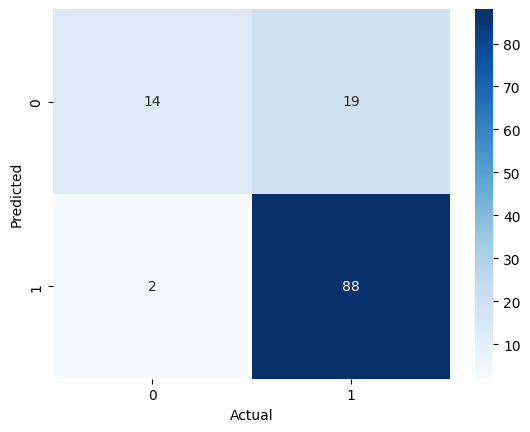

In [56]:
#Importing Confusing_Matrix 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")